# Practice Exercise - Linear Regression

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us.

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [87]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Load the dataset

In [88]:
df = pd.read_csv("boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Check the shape of the dataset**

In [89]:
df.shape

(506, 13)

**Get the info regarding column datatypes**

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [91]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

**Get summary statistics for the numerical columns**

In [92]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**For the column `CHAS`, replace the 1 values with '*yes*' and 0 values with '*no*'.**

In [93]:
df["CHAS"] = df["CHAS"].replace({1: "yes", 0: "no"})
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,no,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,no,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,no,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,no,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,no,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

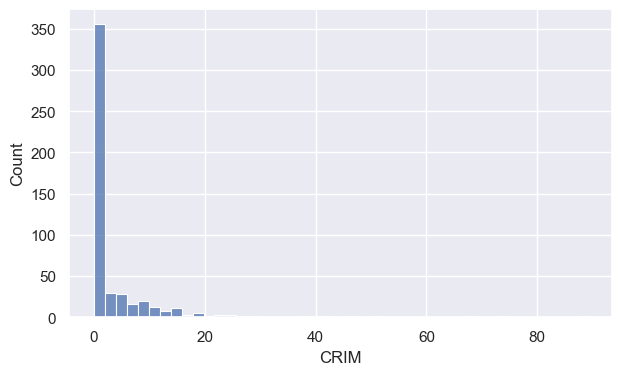

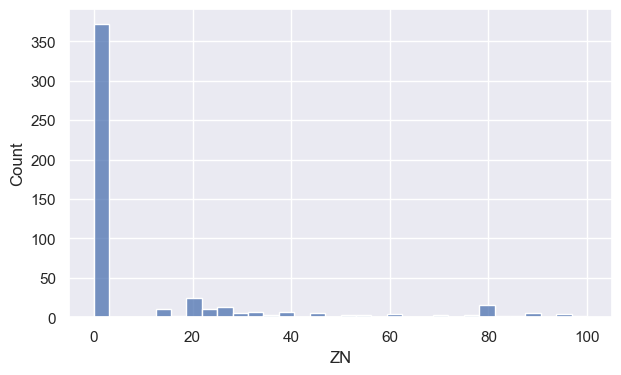

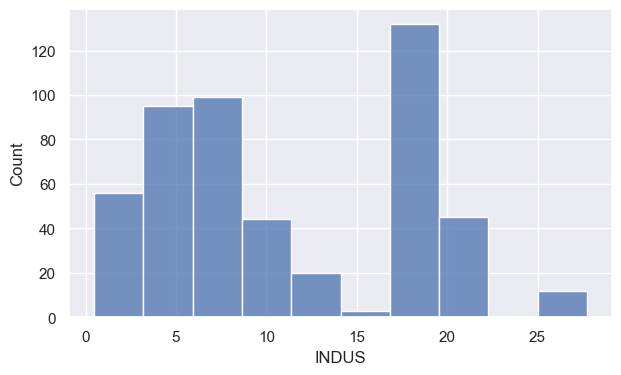

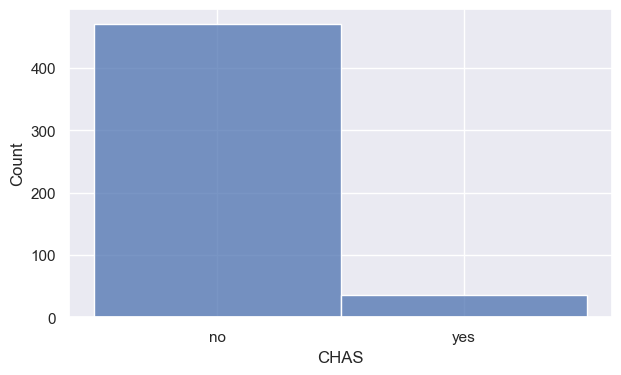

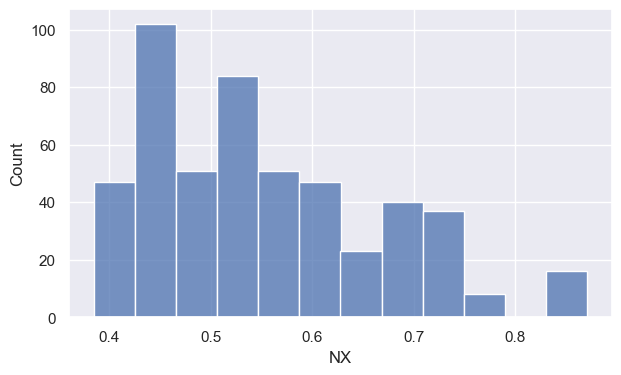

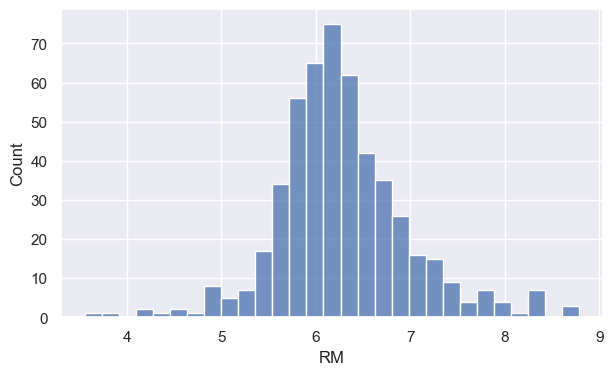

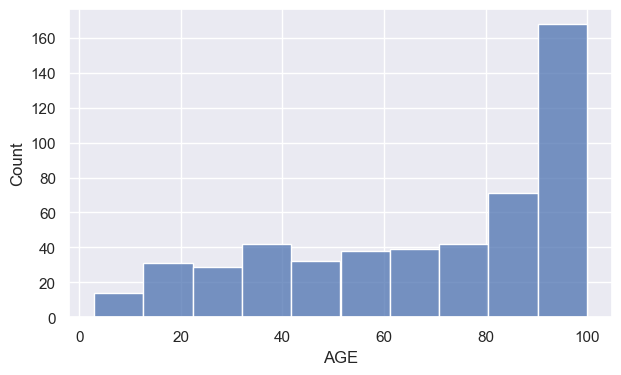

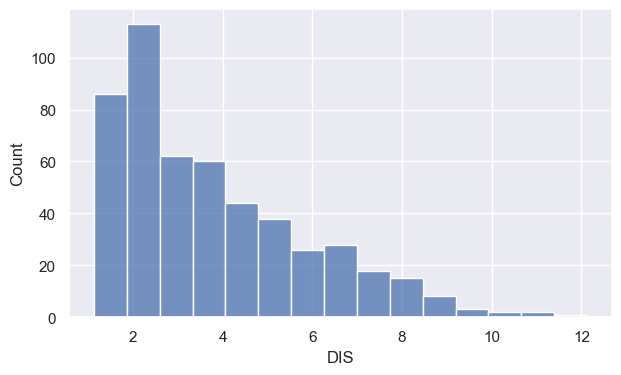

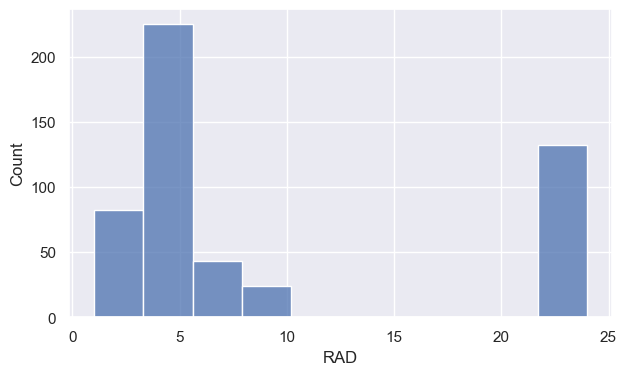

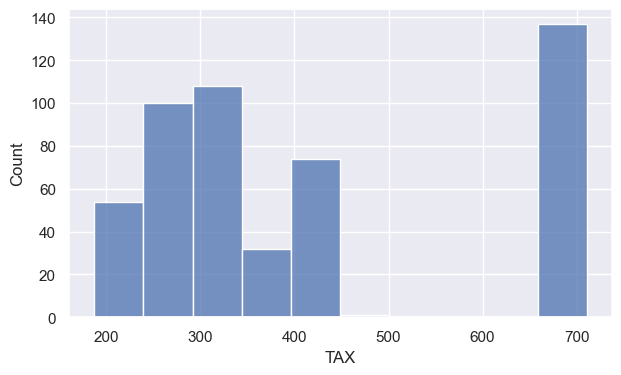

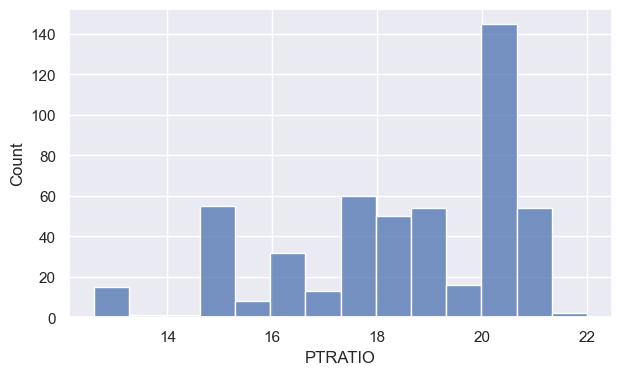

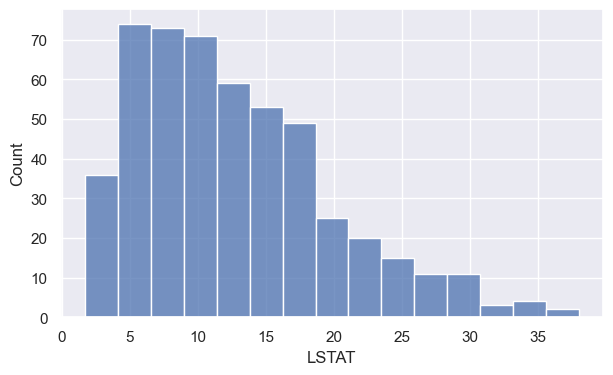

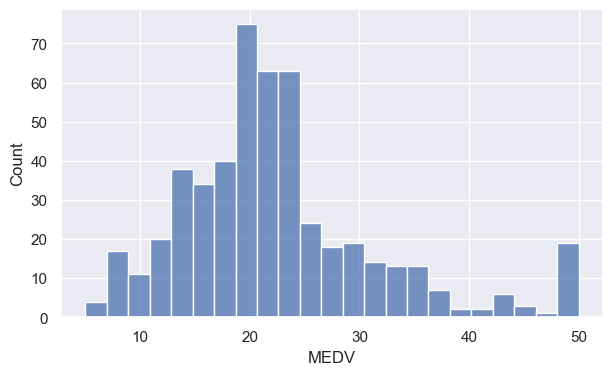

In [94]:
# let's plot all the columns to look at their distributions

import seaborn as sns

for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i)
    plt.show()

* CRIM and ZN have heavily skewed distributions.
* RM and MEDV have close to normal distributions.

**Plot the scatterplots for features and the target variable `MEDV` and list your observations.**

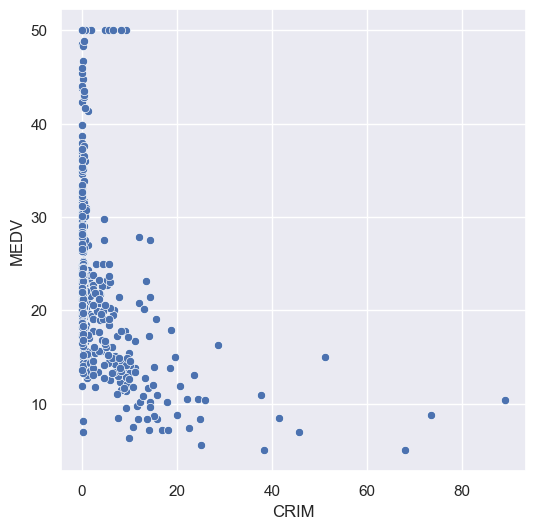

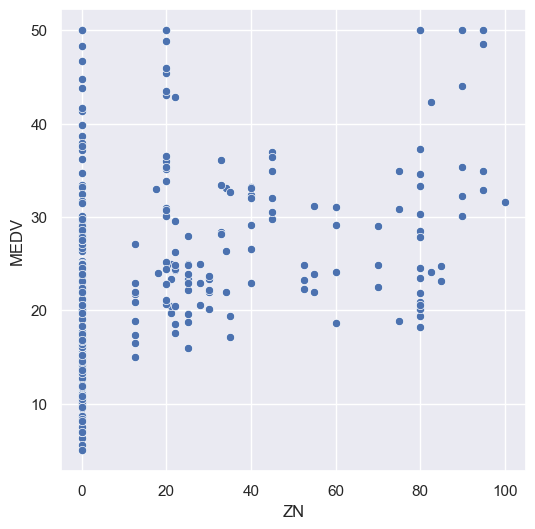

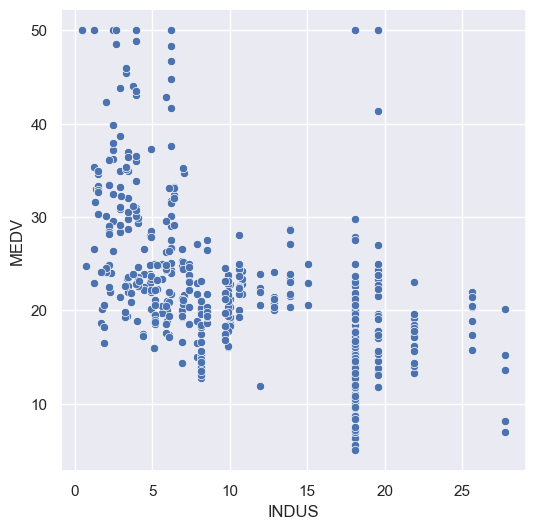

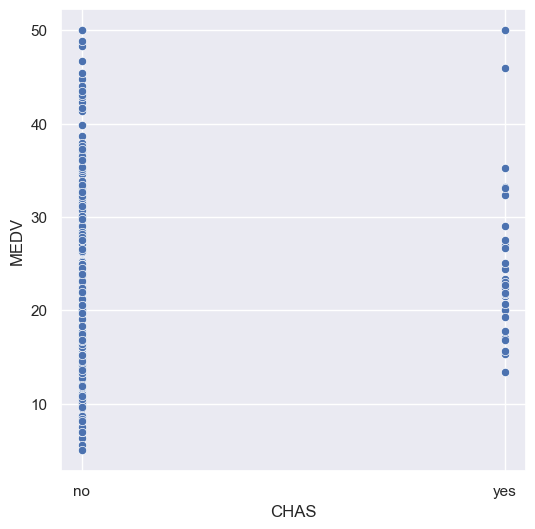

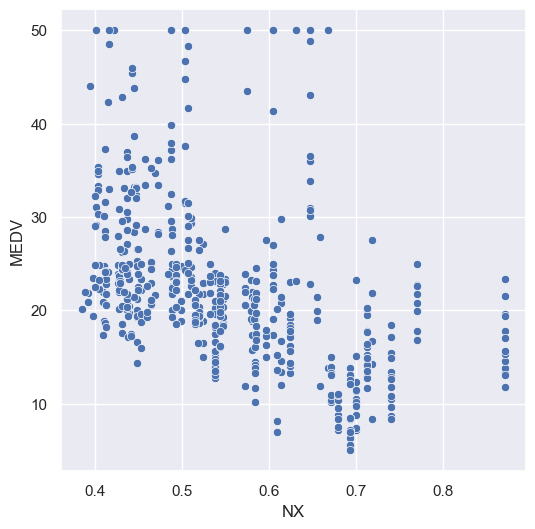

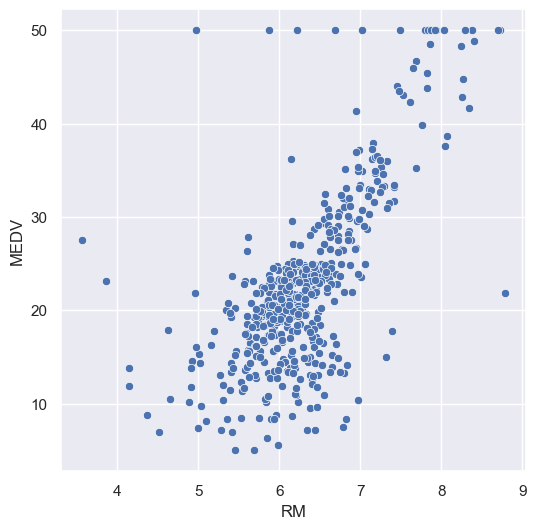

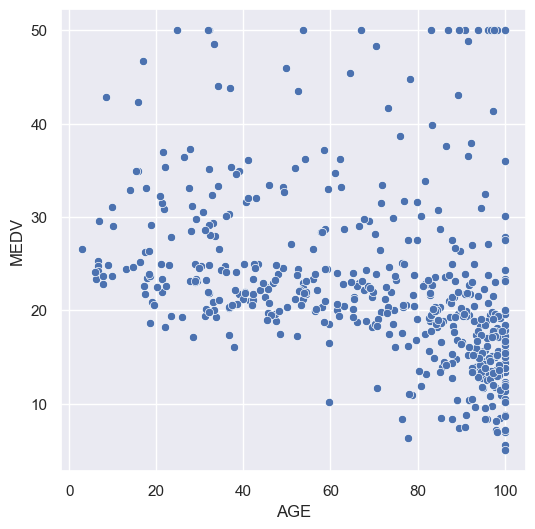

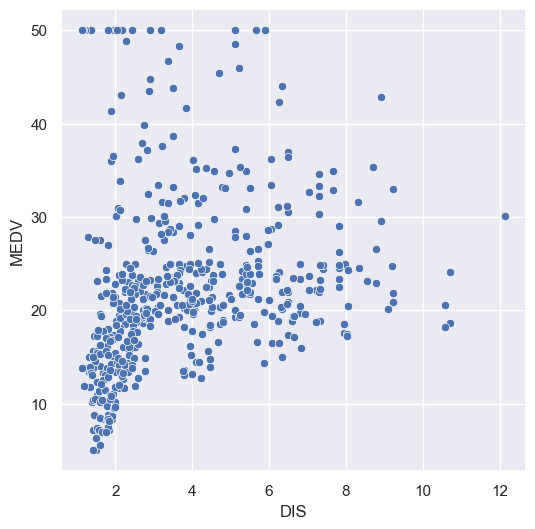

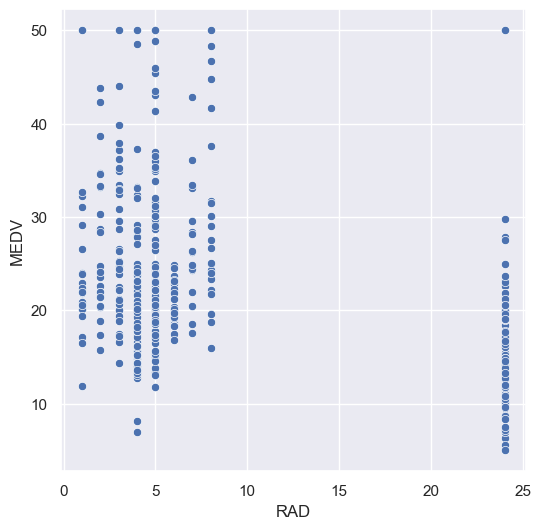

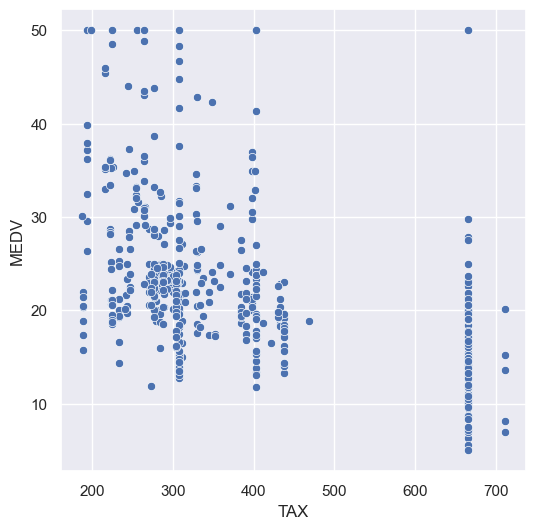

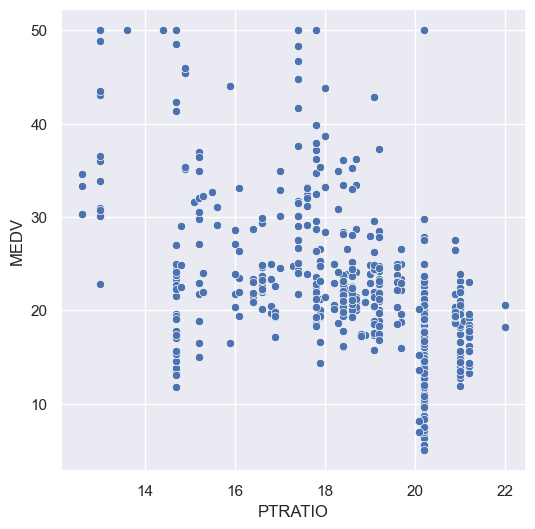

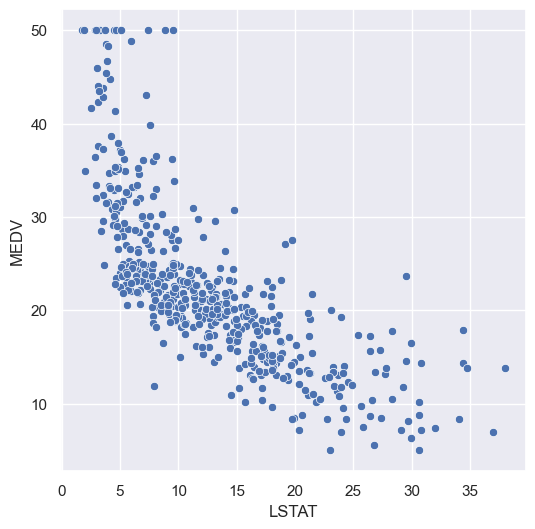

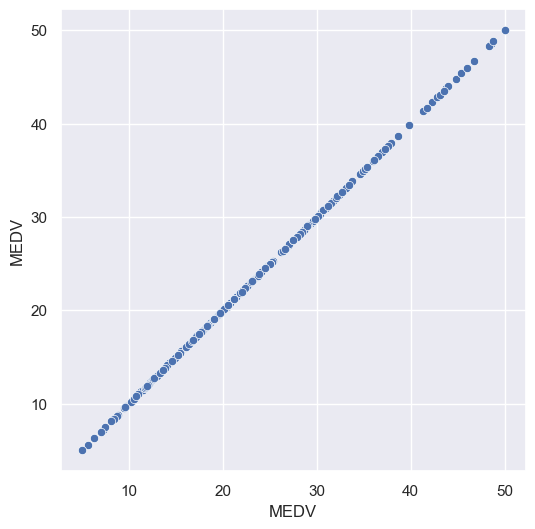

In [95]:
# let's plot the scatterplots of median price with all the features

for i in df.columns:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(data=df, x=i, y="MEDV")
    plt.show()

* LSTAT and RM show a slightly strong linear relationship with MEDV.

**Plot the correlation heatmap and list your observations.**

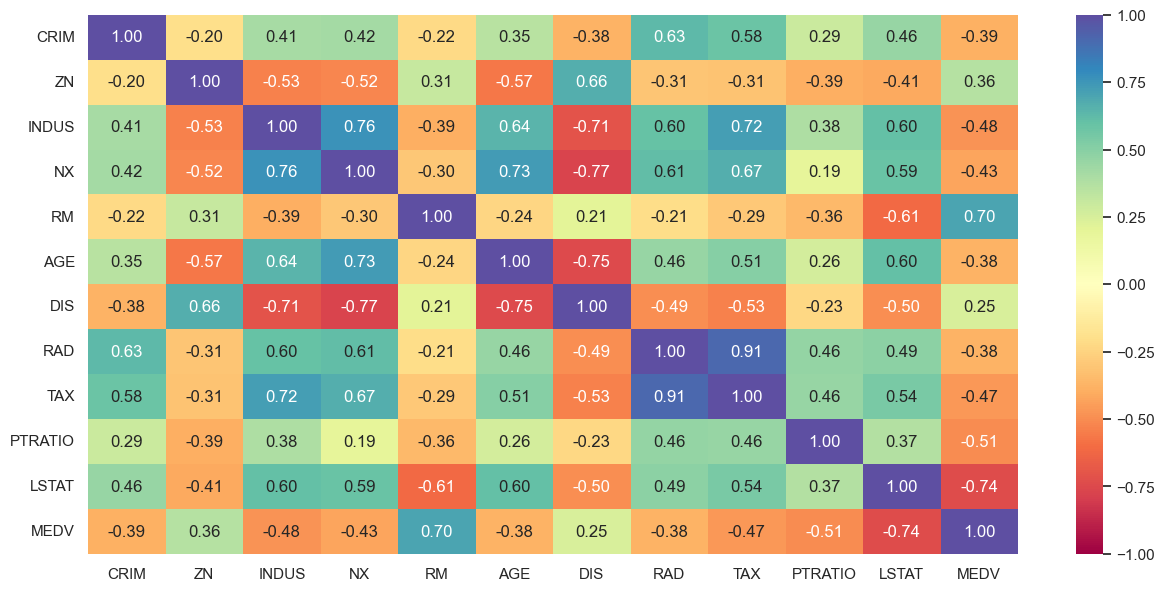

In [96]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* NX and TAX show a slightly strong positive linear relationship with INDUS, while DIS shows a slightly strong negative linear relationship with INDUS.
* NX shows a slightly strong positive linear relationship with AGE, while DIS shows a slightly strong negative linear relationship with AGE.
* RM shows a slightly strong positive linear relationship with MEDV, while LSTAT shows a slightly strong negative linear relationship with MEDV.

### Split the dataset

Split the data into the dependent and independent variables, create dummy variables for the categorical variables, add a constant to the independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [97]:
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,no,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,no,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,no,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,no,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,no,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [98]:
# splitting the data into the dependent and independent variables
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

In [99]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,CRIM,ZN,INDUS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,CHAS_yes
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,False
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,False
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,False
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,False
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,False


In [100]:
# this adds the constant term to the dataset
X = sm.add_constant(X)

In [101]:
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

### Model Building

**Make the linear model using statsmodels OLS and print the model summary.**

In [102]:
X_train = X_train.astype(float)
y_train = y_train.astype(float)

X_train_with_const = sm.add_constant(X_train)

# Fit the model
model = sm.OLS(y_train, X_train_with_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     68.69
Date:                Fri, 24 Oct 2025   Prob (F-statistic):           2.38e-83
Time:                        13:51:31   Log-Likelihood:                -1063.0
No. Observations:                 354   AIC:                             2152.
Df Residuals:                     341   BIC:                             2202.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.8852      6.107      8.168      0.0

**Get the value of the coefficient of determination.**

In [103]:
print("The coefficient of determination (R-squared) is ", model.rsquared)

The coefficient of determination (R-squared) is  0.7073732058856179


**Get the predictions on test set**

In [104]:
y_pred = model.predict(X_test)
y_pred.head()

307    32.401501
343    27.887341
47     17.737617
67     21.686439
362    18.642772
dtype: object

**Calculate MSE for training set**

In [105]:
print(
    "The Mean Square Error (MSE) of the model for the training set is ",
    mean_squared_error(y_train, model.predict(X_train)),
)

The Mean Square Error (MSE) of the model for the training set is  23.758095295443866


In [106]:
# we can also get the MSE by the mse_resid parameter of model
# note that the value will differ slightly due to the consideration of degrees of freedom

print(
    "The Mean Square Error (MSE) of the model for the training set is ", model.mse_resid
)

The Mean Square Error (MSE) of the model for the training set is  24.6638291336866


**Calculate MSE for test set**

In [107]:
print(
    "The Mean Square Error (MSE) of the model for the test set is ",
    mean_squared_error(y_test, model.predict(X_test)),
)

The Mean Square Error (MSE) of the model for the test set is  20.881780202614255


**Get the RMSE on training set**

In [108]:
print(
    "The Root Mean Square Error (RMSE) of the model for the training set is ",
    np.sqrt(mean_squared_error(y_train, model.predict(X_train))),
)

The Root Mean Square Error (RMSE) of the model for the training set is  4.874227661429436


In [109]:
# we can also get the RMSE by the mse_resid parameter of model
# note that the value will differ slightly due to the consideration of degrees of freedom

print(
    "The Mean Square Error (MSE) of the model for the training set is ",
    np.sqrt(model.mse_resid),
)

The Mean Square Error (MSE) of the model for the training set is  4.96626913625174


**Get the RMSE on test set**

In [110]:
print(
    "The Root Mean Square Error (RMSE) of the model for the test set is ",
    np.sqrt(mean_squared_error(y_test, model.predict(X_test))),
)

The Root Mean Square Error (RMSE) of the model for the test set is  4.569658652745766


**Automate the equation of fit**

In [111]:
# Let us write the equation of linear regression
Equation = "Price ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(model.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            "(",
            model.params[i],
            ")*(",
            X_train.columns[i],
            ")",
            "+",
            end=" ",
        )
    else:
        print("(", model.params[i], ")*(", X_train.columns[i], ")")

Price = 49.88523466381775 + ( -0.1138448483691366 )*( CRIM ) + ( 0.061170268040602924 )*( ZN ) + ( 0.054103464958741354 )*( INDUS ) + ( -22.248502345084457 )*( NX ) + ( 2.698412820009902 )*( RM ) + ( 0.004836047284745456 )*( AGE ) + ( -1.534295381999297 )*( DIS ) + ( 0.29883325485900136 )*( RAD ) + ( -0.011413580552025505 )*( TAX ) + ( -0.9889146257039244 )*( PTRATIO ) + ( -0.5861328508499221 )*( LSTAT ) + ( 2.5175119591226904 )*( CHAS_yes )


/var/folders/9m/vf9r_d111lz6j4dpwkqhnmq00000gn/T/ipykernel_7161/3210764102.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(model.params[i], "+", end=" ")
/var/folders/9m/vf9r_d111lz6j4dpwkqhnmq00000gn/T/ipykernel_7161/3210764102.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model.params[i],
/var/folders/9m/vf9r_d111lz6j4dpwkqhnmq00000gn/T/ipykernel_7161/3210764102.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
 